## Heart Failure Prediction
### Group Members:
 #### Godwin Karngong
 #### Temitope Adetunji
 #### Franklin Nkokam Ngongang

## Motivation
### Heart failure, also known as congestive heart failure, is a condition in which the heart is unable to pump sufficient blood to meet the body's needs. This can occur for a variety of reasons, including damage to the heart muscle due to a heart attack or other condition, or problems with the heart's structure that make it difficult for the heart to function properly.	There are different risk factors that can increase the chances of developing heart failure. One of the risk factors is high blood pressure. High blood pressure can cause damage to the heart and increase the chances of a hear failure. Another risk factor is Diabetes, high blood sugar levels can damage the blood vessels and nerves that are controlling the heart, which in turn increases the likelihood of a heart failure. A third risk factor is age, as you age your muscles start to weaken which can increase the risk of heart failure in the muscles of the heart. Anemia is also a increases the risk of heart failure by causing cardiac stress further adding stress to the heart. Other risk factors for heart failure includes smoking, sex, serum sodium levels, serum creatinine levels, platelets levels, creatinine phosphokinase levels and previous family history of heart failure.

Cardiovascular diseases (CVD) are the number one cause of death globally, killing over 17 million people every year. This accounts for 31% of deaths worldwide. Creating a model to predict mortality caused by heart failure can be of great use to prevent this high numbers of mortality every year. People with cardiovascular diseases or who are of high risk (due to the presence of one or many risk factors such as hypertension, diabetes or other diseases) will benefit from early detection, prevention and management wherein a data science and machine learning model can help greatly. Understanding this data will help physicians and other healthcare workers around the world treat their patients better. Improving the overall health of the people from different cultures and countries.

Importing pandas which is help open the file and work with relational or labeled data both easily and intuitively. We are also importing numpy which will help can access and manipulate data in arrays very efficiently. Importing Seaborn will provides a high-level interface for drawing attractive and informative statistical graphics while representing our data. Importing math plotlib will help show plot our data using different graphs, bar plots and so on

In [118]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px
import plotly.graph_objs as go

### Using the python panda library to read and extract the dataset. This will retrieve data in the form of the Dataframe and allow data visualization, We will also call the head() function will show a preview our data in rows and columns

In [119]:
dataset = 'heart_failure_clinical_records_dataset.xls'
df=pd.read_csv(dataset)
df.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


Calculating the mean age of the participants in this study. As we know age is the biggest indicator of high blood pressure which can increase the chances of heart faliure. This important to understand as age is one of the risk factors that cannot be controlled

In [120]:
df2 = df["age"].mean()
df2

60.83389297658862

This plot shows the different ages and how frequent each age is in our data set. Although our average age is 60.83, This graph shows that people all the way from the ages 40 to age 95 were present in this data. We can also visualize a the highest age count in age 60, also a high count for ages 45,65 and 70

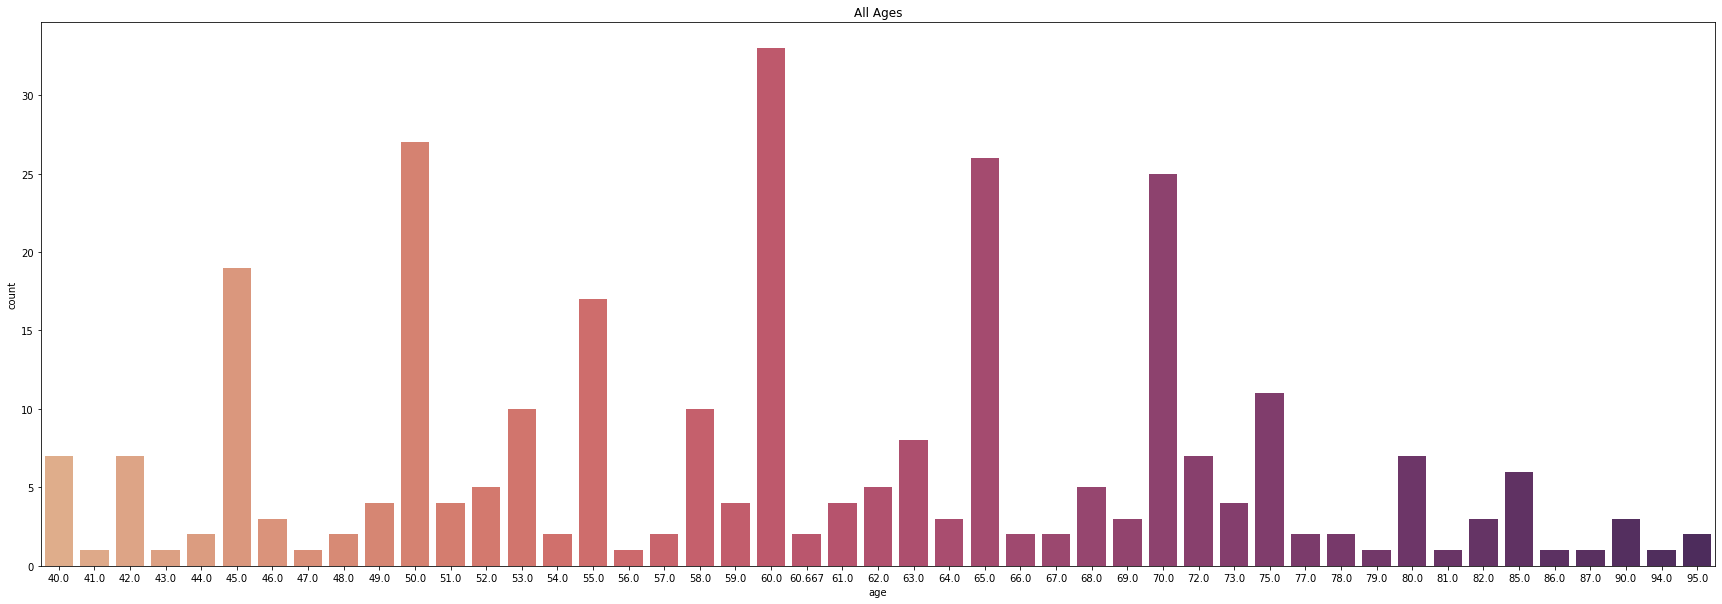

In [121]:
plt.subplots(figsize=(30,10))
sns.countplot(data=df,x='age',palette="flare")
plt.title( 'All Ages')
plt.show()

In [122]:
df.drop_duplicates(inplace=True)

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 32.7 KB


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 32.7 KB


In [125]:
df.shape

(299, 13)

In [126]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [127]:
df.duplicated().sum()

0

In [128]:
import plotly.express as px
import plotly.graph_objs as go

In [129]:
x = []
y = []
features=df.columns
for feature in features:
     x.append(feature)
     y.append(df[feature].mean())
     print(f'{feature} = {df[feature].nunique()}')

age = 47
anaemia = 2
creatinine_phosphokinase = 208
diabetes = 2
ejection_fraction = 17
high_blood_pressure = 2
platelets = 176
serum_creatinine = 40
serum_sodium = 27
sex = 2
smoking = 2
time = 148
DEATH_EVENT = 2


### Scatterplot between continuous variables and density distribution it can check correlation between continuous variables by output

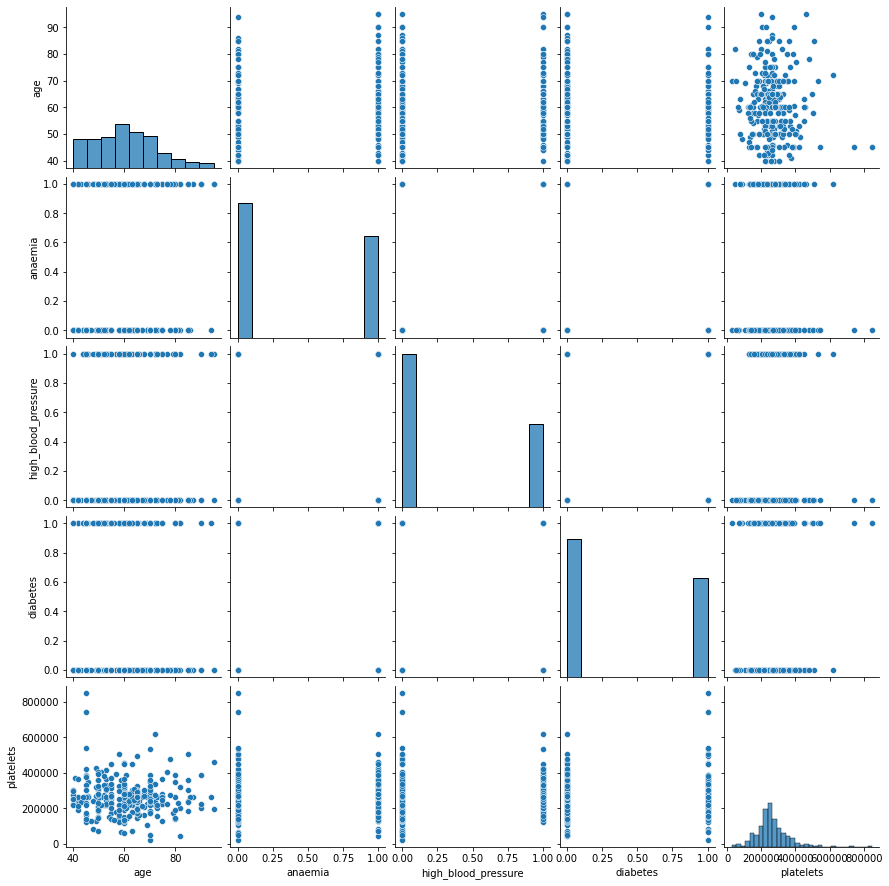

In [130]:
continous_var = ["age","anaemia","high_blood_pressure","diabetes","platelets"] 
sns.pairplot(df[continous_var])

In [131]:
data2 = df.describe()
data2.T.sort_values(ascending =0,by='mean').style.background_gradient(cmap='BuGn').bar(subset=['std'], color='pink').bar(subset=['mean'], color='purple')

,count,mean,std,min,25%,50%,75%,max
platelets,299.000000,263358.029264,97804.236869,25100.000000,212500.000000,262000.000000,303500.000000,850000.000000
creatinine_phosphokinase,299.000000,581.839465,970.287881,23.000000,116.500000,250.000000,582.000000,7861.000000
serum_sodium,299.000000,136.625418,4.412477,113.000000,134.000000,137.000000,140.000000,148.000000
time,299.000000,130.260870,77.614208,4.000000,73.000000,115.000000,203.000000,285.000000
age,299.000000,60.833893,11.894809,40.000000,51.000000,60.000000,70.000000,95.000000
ejection_fraction,299.000000,38.083612,11.834841,14.000000,30.000000,38.000000,45.000000,80.000000
serum_creatinine,299.000000,1.393880,1.034510,0.500000,0.900000,1.100000,1.400000,9.400000
sex,299.000000,0.648829,0.478136,0.000000,0.000000,1.000000,1.000000,1.000000
anaemia,299.000000,0.431438,0.496107,0.000000,0.000000,0.000000,1.000000,1.000000
diabetes,299.000000,0.418060,0.494067,0.000000,0.000000,0.000000,1.000000,1.000000


In [132]:
df.corr().style.background_gradient(cmap='viridis')

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


#### This code will create a bar chart using the plot method of the DataFrame object returned by pd.crosstab(df['age'], df['DEATH_EVENT']).

#### pd.crosstab is a function that generates a cross-tabulation table for two or more factors. 
#### It takes in two or more arrays of variables and returns a DataFrame with the counts of the unique combinations of the variables.
#### In this case, pd.crosstab(df['age'], df['DEATH_EVENT']) will create a cross-tabulation table with the age values in the rows and 
#### the DEATH_EVENT values in the columns. The resulting table will show the count of each unique combination of age and DEATH_EVENT values in the input data.

#### The kind parameter of the plot method specifies the type of chart to create. In this case, kind='bar' will create a bar chart.

#### This code will create a bar chart that shows the counts of each unique combination of age and DEATH_EVENT values in the input data. 
#### The age values will be used as the x-axis labels and the DEATH_EVENT values will be used as the y-axis values. 
#### The chart will show the count of each unique combination of age and DEATH_EVENT values as the height of the bars.

Text(0, 0.5, 'Number of Death Events')

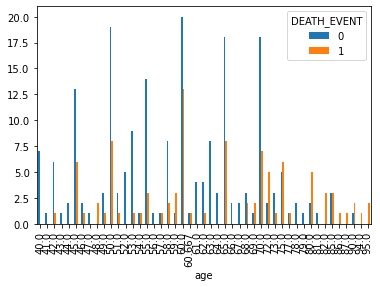

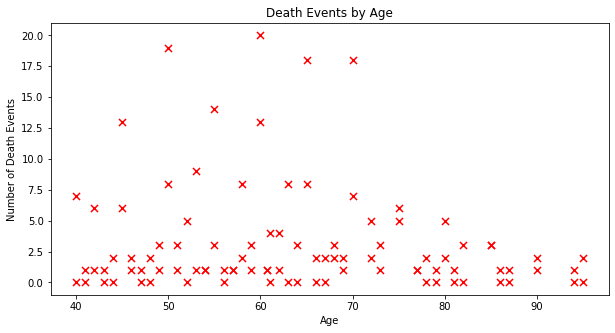

In [133]:

pd.crosstab(df['age'], df['DEATH_EVENT']).plot(kind='bar')
plot_data = pd.crosstab(df['age'], df['DEATH_EVENT']).unstack().reset_index(name='count')
# Plot the x and y values as a scatter plot
plot = plot_data.plot(kind='scatter', x='age', y='count', title='Death Events by Age', figsize=(10, 5), color='red', marker='x', s=50)
plot.set_xlabel('Age')
plot.set_ylabel('Number of Death Events')

In [134]:
for col in df.columns:
    print(col)

age
anaemia
creatinine_phosphokinase
diabetes
ejection_fraction
high_blood_pressure
platelets
serum_creatinine
serum_sodium
sex
smoking
time
DEATH_EVENT


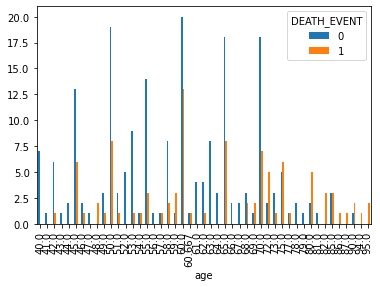

In [135]:
pd.crosstab(df['age'], df['DEATH_EVENT']).plot(kind='bar')

Text(0.5, 1.0, 'Time')

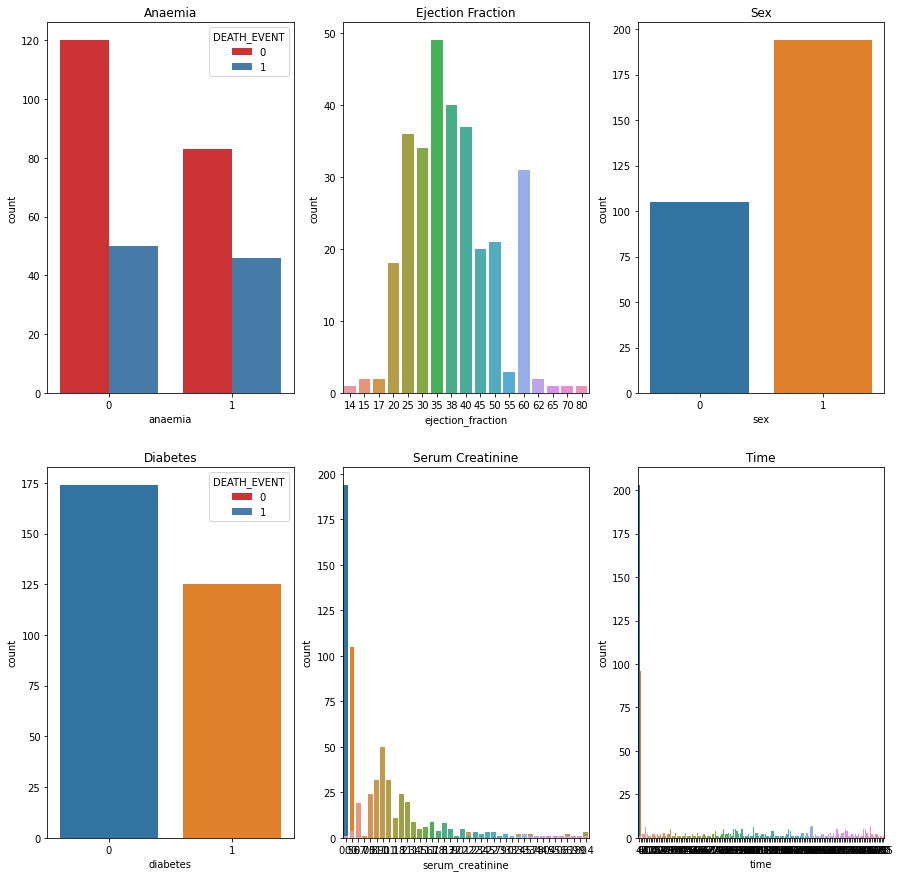

In [136]:
f, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 15))

# Plot bar chart for 'anaemia' column, grouped by 'DEATH_EVENT' column
sns.countplot(x='anaemia', hue='DEATH_EVENT', data=df, palette='Set1', ax=ax[0,0])

# Plot bar chart for 'creatinine_phosphokinase' column, grouped by 'DEATH_EVENT' column
sns.countplot(x='creatinine_phosphokinase', hue='DEATH_EVENT', data=df, palette='Set1', ax=ax[1,0])

# Plot bar chart for 'diabetes' column
sns.countplot(x='diabetes', data=df, ax=ax[1,0])

# Plot bar chart for 'ejection_fraction' column
sns.countplot(x='ejection_fraction', data=df, ax=ax[0,1])

# Plot bar chart for 'high_blood_pressure' column
sns.countplot(x='high_blood_pressure', data=df, ax=ax[1,1])

# Plot bar chart for 'platelets' column
sns.countplot(x='platelets', data=df, ax=ax[1,1])  # modify index to access element within bounds

# Plot bar chart for 'serum_creatinine' column
sns.countplot(x='serum_creatinine', data=df, ax=ax[1,1])  # modify index to access element within bounds

# Plot bar chart for 'serum_sodium' column
sns.countplot(x='serum_sodium', data=df, ax=ax[0,2])

# Plot bar chart for 'sex' column
sns.countplot(x='sex', data=df, ax=ax[0,2])

# Plot bar chart for 'smoking' column
sns.countplot(x='smoking', data=df, ax=ax[1,2])

# Plot bar chart for 'time' column
sns.countplot(x='time', data=df, ax=ax[1,2])  # modify index to access element within bounds

# Set title for each subplot
ax[0,0].set_title('Anaemia')
ax[1,0].set_title('Creatinine Phosphokinase')
ax[1,0].set_title('Diabetes')
ax[0,1].set_title('Ejection Fraction')
ax[1,1].set_title('High Blood Pressure')
ax[1,1].set_title('Platelets')  # modify index to access element within bounds
ax[1,1].set_title('Serum Creatinine')  # modify index to access element within bounds
ax[0,2].set_title('Serum Sodium')
ax[0,2].set_title('Sex')
ax[1,2].set_title('Smoking')
ax[1,2].set_title('Time')  # modify index to access element within bounds


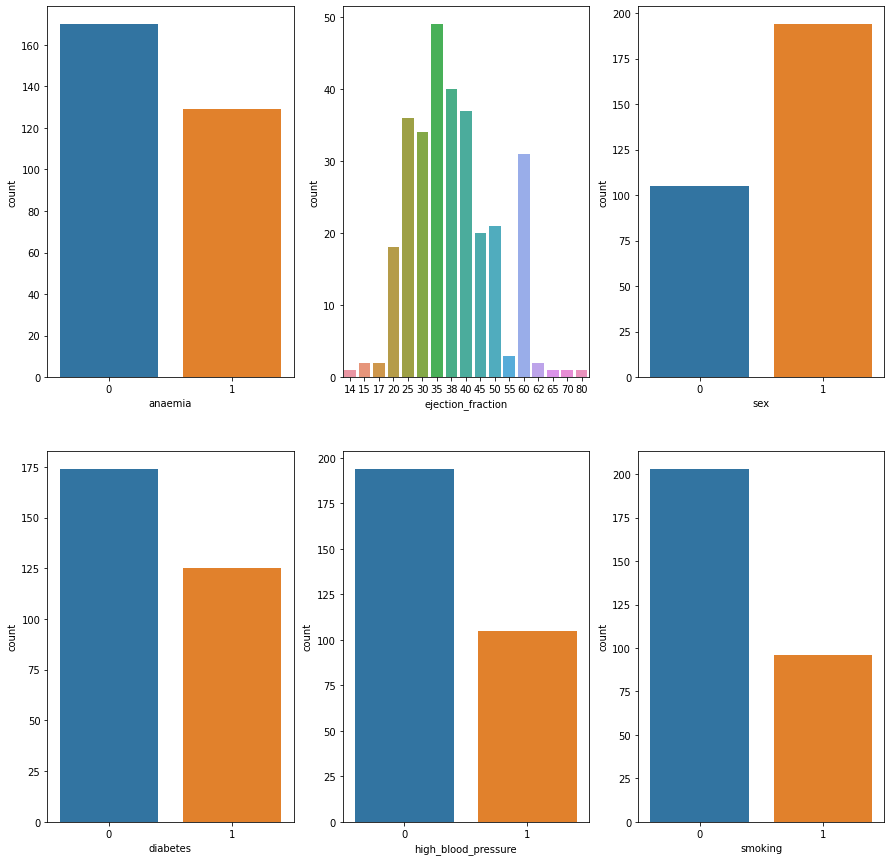

In [137]:
f, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 15))

#fig, axes = plt.subplots((2, 2),figsize=(15, 15))

#create chart in each subplot
#sns.boxplot(data=df, x='age', y='DEATH_EVENT', ax=ax[0,0])
sns.countplot(x='anaemia',data=df,  ax=ax[0,0])
#sns.countplot(x='creatinine_phosphokinase',data=df,  ax=ax[1,0])
sns.countplot(x='diabetes',data=df,  ax=ax[1,0])
sns.countplot(x='ejection_fraction',data=df,  ax=ax[0,1])
sns.countplot(x='high_blood_pressure',data=df,  ax=ax[1,1])
#sns.countplot(x='platelets',data=df,  ax=ax[2,1])
#sns.countplot(x='serum_creatinine',data=df,  ax=ax[3,1])
#sns.countplot(x='serum_sodium',data=df,  ax=ax[0,2])
sns.countplot(x='sex',data=df,  ax=ax[0,2])
sns.countplot(x='smoking',data=df,  ax=ax[1,2])
#sns.countplot(x='time',data=df,  ax=ax[3,2])


The y-axis of the plot represents the age variable,
which represents the age of the individuals in the data. 
The x-axis of the plot represents the smoking variable,
which represents the smoking status of the individuals in the data.
The boxes in the plot are colored based on the DEATH_EVENT variable, 
which represents whether or not the individual died.

The box plot shows the distribution of the data by displaying the median,
first and third quartiles, and minimum and maximum values of the age variable
for each group of smoking and DEATH_EVENT values. The points on top of the boxes
represent the individual data points.
From this plot, you can see that individuals who are older and who smoke are more 
likely to have a higher death event. On the other hand, individuals who are younger 
and who do not smoke are less likely to have a higher death event.



In [138]:
fig = px.box(df, y="age", x="smoking", color="DEATH_EVENT", points="all",  hover_data=df.columns)
fig.update_layout(title_text="Death dependance on diabetes and smoking")
fig.show()

# age and smoking are two factors that can increase the risk of heart failure.
# Heart failure is a condition in which the heart is unable to pump enough blood to meet the body's needs.

# As people get older, their risk of heart failure increases. 
# This is because the heart muscle can become less efficient and less able to pump blood effectively over time. 
# In addition, older people are more likely to have other conditions that can contribute to heart failure, 
# such as high blood pressure, diabetes, and coronary artery disease.

# Smoking is also a major risk factor for heart failure. When you smoke, 
# the chemicals in tobacco damage the heart and blood vessels, making them less able to function properly. 
# Smoking can cause high blood pressure, which can lead to heart failure.
# It can also increase the risk of coronary artery disease,
# which can cause the heart to become damaged and weak.

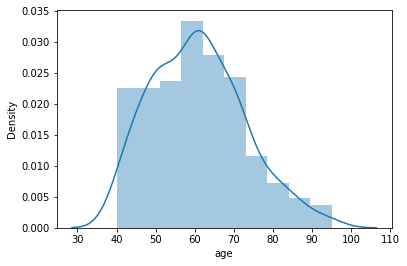

In [139]:
sns.distplot(df['age'])
plt.show()

## This line of code appears to be using the groupby function in the pandas library to group a dataframe (df) by the column 'age' and then calculating the mean of certain features for each group.

### The groupby function in pandas allows you to group a dataframe by one or
### more columns and then apply a function to each group. In this case, the dataframe (df) 
### is grouped by the column 'age', 
### and the mean of certain features is calculated for each group.

### The [features] part of the code specifies which columns or features to include in the calculation.
### For example, if features is a list containing the column names ['col1', 'col2'], the mean of 'col1' and 'col2' will
### be calculated for each group.

### The result of this operation is a new dataframe that contains the mean of the specified features for
### each group, with one row for each unique value in the 'age' column.

In [140]:
df.groupby('age')[features].mean()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,,,,,,,,,,,,,
40.000,40.000,0.285714,321.142857,0.285714,36.428571,0.142857,262428.571429,0.942857,137.714286,0.714286,0.285714,198.285714,0.000000
41.000,41.000,0.000000,148.000000,0.000000,40.000000,0.000000,374000.000000,0.800000,140.000000,1.000000,1.000000,68.000000,0.000000
42.000,42.000,0.285714,908.142857,0.285714,35.714286,0.000000,244051.147143,1.468571,137.142857,0.714286,0.428571,143.428571,0.142857
43.000,43.000,1.000000,358.000000,0.000000,50.000000,0.000000,237000.000000,1.300000,135.000000,0.000000,0.000000,97.000000,0.000000
44.000,44.000,0.000000,333.000000,1.000000,35.000000,1.000000,249179.015000,1.150000,134.500000,1.000000,0.500000,161.500000,0.000000
45.000,45.000,0.210526,1239.000000,0.578947,39.263158,0.263158,331300.845263,1.024211,137.578947,0.631579,0.157895,156.315789,0.315789
46.000,46.000,0.333333,392.666667,0.333333,30.666667,0.666667,294119.343333,1.393333,133.666667,0.000000,0.000000,105.333333,0.333333
47.000,47.000,0.000000,582.000000,0.000000,25.000000,0.000000,130000.000000,0.800000,134.000000,1.000000,0.000000,201.000000,0.000000
48.000,48.000,1.000000,356.500000,1.000000,42.500000,0.500000,165500.000000,1.750000,125.500000,0.000000,0.000000,104.000000,1.000000


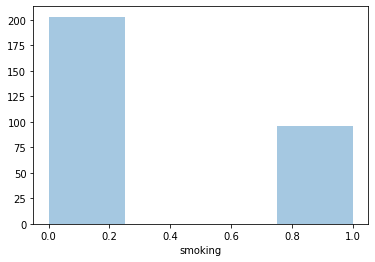

In [141]:
sns.distplot(df['smoking'], kde=False)
plt.show()

In [142]:
df.groupby('smoking')[features].mean()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
smoking,,,,,,,,,,,,,
0,60.681448,0.467980,580.226601,0.46798,38.630542,0.369458,261462.209261,1.413350,136.610837,0.502463,0.0,131.477833,0.325123
1,61.156250,0.354167,585.250000,0.31250,36.927083,0.312500,267366.898646,1.352708,136.656250,0.958333,1.0,127.687500,0.312500


#### Just like above, the lines of code below appears to be using the groupby function in the pandas library to group a dataframe (df) by the column 'smoking' and then calculating the mean of certain features for each group.

#### The groupby function in pandas allows you to group a dataframe by one or more columns and then apply a function to each group. In this case, the dataframe (df) is grouped by the column 'smoking', and the mean of certain features is calculated for each group.

### The [features] part of the code specifies which columns or features to include in the calculation.
### For example, if features is a list containing the column names ['col1', 'col2'], the mean of 'col1' and 'col2' will
### be calculated for each group.

### The result of this operation is a new dataframe that contains the mean of the specified features for
### each group, with one row for each unique value in the 'smoking' column.

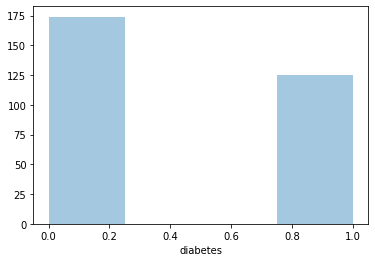

In [143]:
sns.distplot(df['diabetes'], kde=False)
plt.show()

## same for diabetes

In [144]:
df.groupby('diabetes')[features].mean()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
diabetes,,,,,,,,,,,,,
0,61.850575,0.436782,589.752874,0.0,38.132184,0.356322,255728.324598,1.43500,136.95977,0.712644,0.37931,128.045977,0.321839
1,59.418672,0.424000,570.824000,1.0,38.016000,0.344000,273978.578160,1.33664,136.16000,0.560000,0.24000,133.344000,0.320000


## The pie chart is intended to visualize the relationship between the presence or 
### absence of anemia (as indicated by the 'sex' column) and death events (as indicated by the 'DEATH_EVENT' column).

### The 'sex' column appears to be used as a proxy for the presence or absence of anemia, with a value 
### of 1 indicating the presence of anemia and a value of 0 indicating the absence of anemia. The 'DEATH_EVENT' column 
### is a binary column that indicates whether a death event occurred (value of 1) or did not occur (value of 0).

### The pie chart shows the number of rows in each of four categories:

### 1. true_anaemia_nodeath: rows in which the value of 'sex' is 1 (indicating the presence of anemia) 
### and the value of 'DEATH_EVENT' is 0 (indicating no death event occurred)


### 2. true_anaemia_death: rows in which the value of 'sex' is 1 
###     (indicating the presence of anemia) and the value of 'DEATH_EVENT' is 1 (indicating a death event occurred)
### 3. false_anaemia_nodeath: rows in which the value of 'sex' is 0 
###     (indicating the absence of anemia) and the value of 'DEATH_EVENT' is 0 (indicating no death event occurred)
### 4. false_anaemia_death: rows in which the value of 'sex' is 0
###     (indicating the absence of anemia) and the value of 'DEATH_EVENT' is 1
###     (indicating a death event occurred)
### 5. The pie chart shows the proportion of rows in each of these categories as 
### a percentage of the total number of rows. It is intended to provide a visual representation of the relationship between anemia and death events.


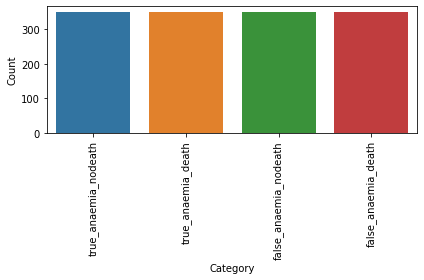

In [145]:

import seaborn as sns
# Create a new dataframe with the counts of rows in each of the four categories
df_counts = pd.DataFrame({'Category': ['true_anaemia_nodeath','true_anaemia_death', 'false_anaemia_nodeath', 'false_anaemia_death'], 'Count': values})

# Create a bar plot using the 'Category' column as the x axis and the 'Count' column as the y axis
sns.barplot(x='Category', y='Count', data=df_counts)

# Set the x-axis tick labels to be vertical
plt.xticks(rotation=90)

# Add space between the bars
plt.tight_layout()

# Show the plot
plt.show()


## In this case, the 'sex' column is being used as a proxy for smoking status, 
### and the 'DEATH_EVENT' column is a binary column indicating whether a death event 
### occurred (value of 1) or did not occur (value of 0).

### The bar plot shows the distribution of rows in each of these categories,
### but it does not directly show the correlation between smoking status and death events.
### To measure the correlation between these variables, you would need to use a different 
### statistical analysis method, 
### such as a scatter plot, Pearson's correlation coefficient, or a linear regression model.

#### First, smoking damages the blood vessels and can lead to the development of atherosclerosis, which is a condition in which the arteries become narrowed
### and clogged with plaque. This can make it more difficult for blood to flow to the heart and can eventually lead to heart failure.

### Second, smoking damages the lining of the blood vessels and can cause inflammation, which can contribute to the development of heart failure.

### Finally, smoking can increase the risk of developing other conditions that can lead to heart failure, such as high blood pressure, diabetes, and obesity.

### The graph provided shows the relationship between smoking and the risk of developing heart failure over time. As you can see,
### the risk of developing heart failure increases with age, and the risk is much higher for smokers than it is for non-smokers.
### This illustrates the strong connection between smoking and heart failure, and underscores the importance of quitting smoking to
### reduce the risk of developing this serious condition

In [146]:
true_smoking = df[df["sex"]==1]
false_smoking = df[df["sex"]==0]

true_smoking_nodeath = true_smoking[df["DEATH_EVENT"]==0]
true_smoking_death = true_smoking[df["DEATH_EVENT"]==1]
false_smoking_nodeath = false_smoking[df["DEATH_EVENT"]==0]
false_smoking_death = false_smoking[df["DEATH_EVENT"]==1]

labels = ['true_smoking_nodeath','true_smoking_death', 'false_smoking_nodeath', 'false_smoking_death']
values = [len(true_smoking[df["DEATH_EVENT"]==0]),len(true_smoking[df["DEATH_EVENT"]==1]),
         len(false_smoking[df["DEATH_EVENT"]==0]),len(false_smoking[df["DEATH_EVENT"]==1])]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="smoking analysis")
fig.show()

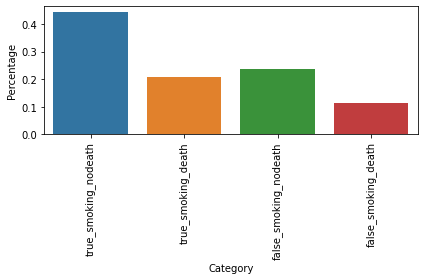

In [147]:

import seaborn as sns
# Create a new dataframe with the counts and percentages of rows in each of the four categories
df_counts = pd.DataFrame({'Category': ['true_smoking_nodeath','true_smoking_death', 'false_smoking_nodeath', 'false_smoking_death'], 'Count': values })
df_counts['Percentage'] = df_counts['Count'] / df_counts['Count'].sum()

# Create a bar plot using the 'Category' column as the x axis and the 'Percentage' column as the y axis
sns.barplot(x='Category', y='Percentage', data=df_counts)

# Set the x-axis tick labels to be vertical
plt.xticks(rotation=90)

# Add space between the bars
plt.tight_layout()

# Show the plot
plt.show()


In [148]:
df.time.mean(),df.time.std()

(130.2608695652174, 77.61420795029339)

In [149]:
upperlimit =df.time.mean()+df.time.std()
lowerlimit =df.time.mean()-df.time.std()

In [150]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [151]:
cols_to_scale = ['age',  'creatinine_phosphokinase', 
       'ejection_fraction', 'platelets',
       'serum_creatinine', 'serum_sodium', 'time']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [152]:
X=df.drop(['DEATH_EVENT'],axis='columns')
y=df['DEATH_EVENT']

In [153]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='auto')
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

1    203
0    203
Name: DEATH_EVENT, dtype: int64

In [154]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm,test_size=0.2,random_state=5)

In [155]:
df.time.mean(),df.time.std()

(0.4493269379545103, 0.2762071457305815)

In [156]:
upperlimit =df.time.mean()+df.time.std()
lowerlimit =df.time.mean()-df.time.std()

In [157]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [158]:
cols_to_scale = ['age',  'creatinine_phosphokinase', 
       'ejection_fraction', 'platelets',
       'serum_creatinine', 'serum_sodium', 'time']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [159]:
X=df.drop(['DEATH_EVENT'],axis='columns')
y=df['DEATH_EVENT']

In [160]:
X.shape

(299, 12)

In [161]:
y.shape

(299,)

In [162]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

1    203
0    203
Name: DEATH_EVENT, dtype: int64

In [163]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm,test_size=0.2,random_state=5)

# Machine learing analysis

In [164]:
from sklearn.model_selection import ShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB


model_params = {
             
    
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    },
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
   'naive_bayes_gaussian': {
        'model': GaussianNB(),
        'params': {}
    },
    'naive_bayes_multinomial': {
        'model': MultinomialNB(),
        'params': {}
    },
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini','entropy'],
        }   
    },
    
       'XGB_Classifier':{
        'model':XGBClassifier(),
        'params':{
            'base_score':[0.5]
            
        }
    } 
        
     
}


In [165]:
from sklearn.model_selection import GridSearchCV
scores = []
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=cv, return_train_score=False)
    clf.fit(X,y)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,random_forest,0.846667,{'n_estimators': 10}
1,logistic_regression,0.810000,{'C': 5}
2,svm,0.830000,"{'C': 1, 'kernel': 'linear'}"
3,naive_bayes_gaussian,0.756667,{}
4,naive_bayes_multinomial,0.663333,{}
5,decision_tree,0.776667,{'criterion': 'gini'}
6,XGB_Classifier,0.840000,{'base_score': 0.5}


In [166]:
model=svm.SVC()
model.fit(X_train, y_train)


SVC()

In [167]:
model.score( X_test, y_test)

0.8170731707317073

In [168]:
y_predicted = model.predict(X_test)

In [169]:
y_predicted[:5]

array([0, 1, 1, 1, 1])

In [170]:
y_test[:5]

284    0
71     0
49     1
335    1
43     0
Name: DEATH_EVENT, dtype: int64

In [171]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82        42
           1       0.80      0.82      0.81        40

    accuracy                           0.82        82
   macro avg       0.82      0.82      0.82        82
weighted avg       0.82      0.82      0.82        82



In [172]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_predicted)
print(f'{mean_squared_error}: {mse}')

<function mean_squared_error at 0x7f09559994c0>: 0.18292682926829268


Text(69.0, 0.5, 'Truth')

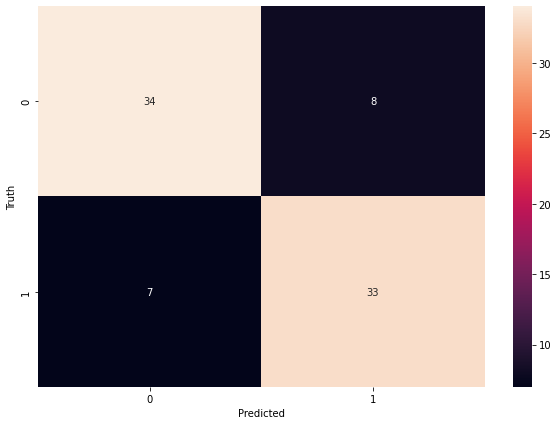

In [173]:
y_predicted = model.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Deep learning analysis

In [174]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
mode = keras.Sequential([
    keras.layers.Dense(64, input_dim=12, activation='relu'),
    keras.layers.Dropout(0.5),#Dropout Layer
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.5),#Dropout Layer
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.5),#Dropout Layer
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.5),#Dropout Layer
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dropout(0.5),#Dropout Layer
    keras.layers.Dense(1, activation='sigmoid')
])

mode.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history =mode.fit(X_train, y_train, epochs=100,verbose=2 ,batch_size=4)

Epoch 1/100
81/81 - 1s - loss: 0.7047 - accuracy: 0.5000 - 873ms/epoch - 11ms/step
Epoch 2/100
81/81 - 0s - loss: 0.7024 - accuracy: 0.5278 - 178ms/epoch - 2ms/step
Epoch 3/100
81/81 - 0s - loss: 0.7112 - accuracy: 0.4938 - 160ms/epoch - 2ms/step
Epoch 4/100
81/81 - 0s - loss: 0.6936 - accuracy: 0.5000 - 185ms/epoch - 2ms/step
Epoch 5/100
81/81 - 0s - loss: 0.6916 - accuracy: 0.5000 - 190ms/epoch - 2ms/step
Epoch 6/100
81/81 - 0s - loss: 0.7002 - accuracy: 0.5093 - 192ms/epoch - 2ms/step
Epoch 7/100
81/81 - 0s - loss: 0.6966 - accuracy: 0.5185 - 182ms/epoch - 2ms/step
Epoch 8/100
81/81 - 0s - loss: 0.6998 - accuracy: 0.5000 - 179ms/epoch - 2ms/step
Epoch 9/100
81/81 - 0s - loss: 0.6949 - accuracy: 0.5123 - 166ms/epoch - 2ms/step
Epoch 10/100
81/81 - 0s - loss: 0.6922 - accuracy: 0.4846 - 181ms/epoch - 2ms/step
Epoch 11/100
81/81 - 0s - loss: 0.6866 - accuracy: 0.5586 - 168ms/epoch - 2ms/step
Epoch 12/100
81/81 - 0s - loss: 0.6943 - accuracy: 0.5185 - 161ms/epoch - 2ms/step
Epoch 13/100

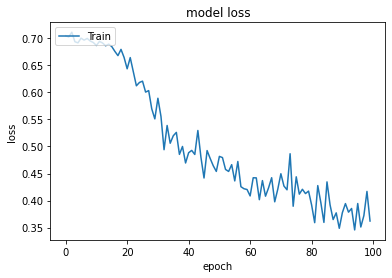

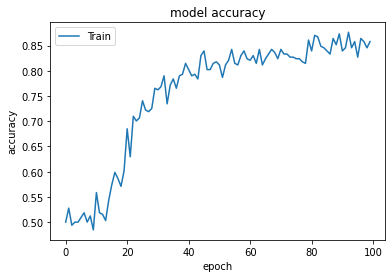

In [175]:
# summarize history for loss
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [176]:
mode.evaluate(X_test, y_test)

3/3 [==============================] - 0s 5ms/step - loss: 0.3736 - accuracy: 0.8049


[0.3736221194267273, 0.8048780560493469]

In [177]:
y_predicated=mode.predict(X_test).reshape(-1)


3/3 [==============================] - 0s 3ms/step


In [178]:
y_predicated=np.round(y_predicated)
#y_predicated

In [179]:
print(classification_report(y_test, y_predicated))

              precision    recall  f1-score   support

           0       0.84      0.76      0.80        42
           1       0.77      0.85      0.81        40

    accuracy                           0.80        82
   macro avg       0.81      0.81      0.80        82
weighted avg       0.81      0.80      0.80        82



Text(42.0, 0.5, 'Truth')

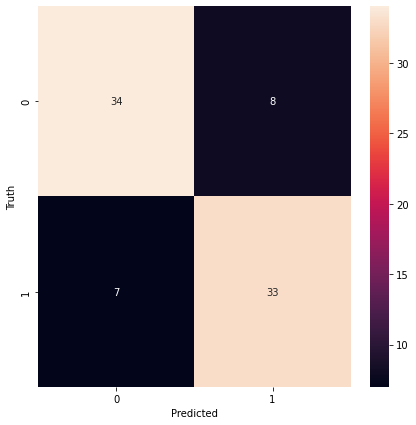

In [180]:
y_predicated = model.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicated)
plt.figure(figsize = (7,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [181]:
xp = model.predict(X_train)

In [182]:
Y_pre = np.append(xp, y_predicated)
model_resul = pd.DataFrame(Y_pre)


Text(0, 0.5, 'cases_number')

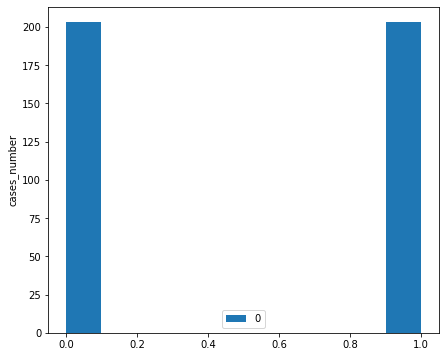

In [183]:
model_resul.plot.hist(figsize=(7,6))

plt.ylabel('cases_number')

# Model using Long Short Term Memory networks (LTSM) analysis
Long Short Term Memory networks – usually just called “LSTMs” – are a special kind of Recurrent Neural Networks(RNN), capable of learning long-term dependencies. They were introduced by Hochreiter & Schmidhuber (1997), and were refined and popularized by many people in following work.1 They work tremendously well on a large variety of problems, and are now widely used.

LSTMs are explicitly designed to avoid the long-term dependency problem. Remembering information for long periods of time is practically their default behavior, not something they struggle to learn!

All recurrent neural networks have the form of a chain of repeating modules of neural network. In standard RNNs, this repeating module will have a very simple structure, such as a single tanh layer.

Reference : https://colah.github.io/posts/2015-08-Understanding-LSTMs/

In [184]:
import pandas_datareader as reader
import datetime as datetime
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from keras import Sequential
from keras.layers import LSTM
from keras.layers import Dense, Dropout
from keras.utils.vis_utils import plot_model
from sklearn.model_selection import train_test_split

In [185]:
# Read the data again in case we changed it
df=pd.read_csv(dataset)

In [186]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [187]:
x_train, x_test, y_train, y_test = train_test_split(df[["age","anaemia","creatinine_phosphokinase","diabetes","ejection_fraction","high_blood_pressure","platelets",
                                                        "serum_creatinine", "serum_sodium","sex", "smoking", 	"time" 	]], df["DEATH_EVENT"], test_size=0.15, random_state=42)

In [188]:
print(x_train)
print(x_test)

        age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
197  65.000        0                       167         0                 30   
210  70.000        0                       212         1                 17   
288  65.000        0                       892         1                 35   
219  55.000        0                       582         1                 35   
178  63.000        1                       122         1                 60   
..      ...      ...                       ...       ...                ...   
188  60.667        1                       151         1                 40   
71   58.000        0                       582         1                 35   
106  55.000        0                       748         0                 45   
270  44.000        0                       582         1                 30   
102  80.000        0                       898         0                 25   

     high_blood_pressure  platelets  serum_creatini

In [189]:
print(y_train)
print(y_test)

197    0
210    0
288    0
219    0
178    0
      ..
188    0
71     0
106    0
270    0
102    0
Name: DEATH_EVENT, Length: 254, dtype: int64
281    0
265    0
164    1
9      1
77     0
278    0
93     1
109    0
5      1
173    0
97     0
195    1
184    1
154    0
57     0
60     1
147    0
108    0
63     1
140    1
155    0
104    0
247    0
46     1
42     1
275    0
280    0
116    0
213    1
236    0
17     1
239    0
33     0
24     1
45     1
7      1
113    1
194    1
111    0
92     0
75     1
82     1
118    0
76     0
129    0
Name: DEATH_EVENT, dtype: int64


In [190]:
#Model Architecture
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(1, x_train.shape[1]), activation="relu", return_sequences=False))
lstm.add(Dense(1))
#An optimizer is used to help improve upon the Loss function, while the Loss function gives us information on 
#how the model did on training.
lstm.compile(loss="mean_squared_error", optimizer="adam")

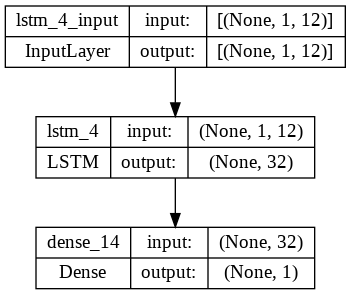

In [191]:
plot_model(lstm, show_shapes=True, show_layer_names=True)

In [192]:
xtrain = np.array(x_train)
xtrain = xtrain.reshape(xtrain.shape[0], 1, xtrain.shape[1]) #Reshape data to align with parameter
#Here we start training the model by setting it to iterate over the entire dataset a 100 times, with a batch size of 8
history = lstm.fit(xtrain, y_train, epochs = 100, batch_size = 8, verbose = 1, shuffle = False)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 49922620.0000
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 4645077.5000
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 36172.0430
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 6713.3457
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 1879.7327
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 1840.0082
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 1800.9696
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 1774.5858
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 1745.0970
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 1714.1451
Epoch 11/100
32/32 [==============================] - 0s 3ms/step - loss: 1681.8439
Epoch 12/100
32/32 [==============================] - 0s 3ms/step - loss: 164

In [193]:
#Convert to a np array so that we can use it in our LSTM Model.
xtest = np.array(x_test)
#Now we need to reshape our data because our dataset is 2D but the LSTM Model expects a 3D shape
xtest = xtest.reshape(xtest.shape[0], 1, xtest.shape[1]) #Reshape data to align with parameter
#Next we need to get the models death event
model_pred = lstm.predict(xtest)
model_pred;

2/2 [==============================] - 0s 7ms/step


In [194]:
### correlation with age

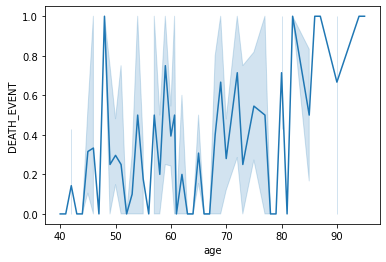

In [195]:
sns.lineplot(data=df, x="age", y="DEATH_EVENT")

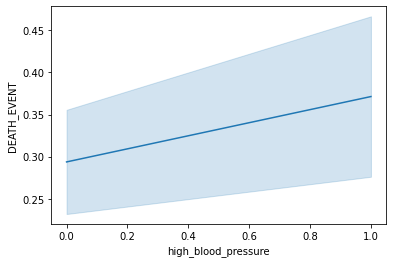

In [196]:
sns.lineplot(data=df, x="high_blood_pressure", y="DEATH_EVENT")

## correlation with time

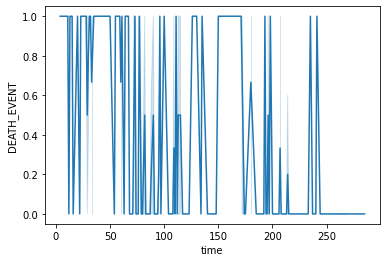

In [197]:
sns.lineplot(data=df, x="time", y="DEATH_EVENT")

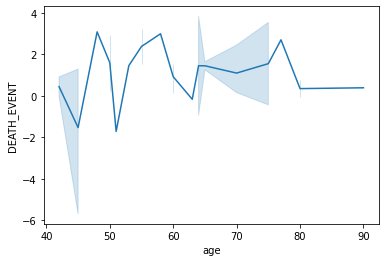

In [198]:
x_test["DEATH_EVENT"] = model_pred
sns.lineplot(data=x_test, x="age", y="DEATH_EVENT")

After analysis, we have noticed that although the LSTM model follows the general trends of the graph, it sometimes over/underestimates the death event greatly.



GOAL

Our goal was to analyze death history with two different types of models. In this next part we will be using more layers of an LSTM model than our previous solution. This model will have an additional Dropout layer to further help to prevent overfitting. On our first model, we noticed that our model ws overfitting the data that we had even after training the model multiple times. Using a different and more extensive use of data. We will create and load the same data wuth a different model


In [199]:
#First we load in the data
new_data = pd.read_csv(dataset)
new_data.head()
#Next we prepare the data
scale = MinMaxScaler(feature_range = (0, 1))
#Next we reshape the data to be able to fit the liner regression model
reshaped_data = new_data['DEATH_EVENT'].values.reshape(-1, 1)
scaling_data = scale.fit_transform(reshaped_data)
scaling_data

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],

In [200]:
#Create empty arrays to store data to train
xtrain = []
ytrain = []
length_of_scale = len(scaling_data)
#We want to start prediction from 50 days to the end of the length of the scaled dataset
#We are going to fill the data by starting at the 50th index and iterate until the end of the scaled data
for values in range(50, length_of_scale):
  #Append values to the train dataset array, we are trying to set the model to train the first 50 values and append that to xtrain
  #Then from the 51st value that we already know we are going to set that to ytrain so that our model will be ble to predict the next values 
  xtrain.append(scaling_data[values - 50 : values, 0])
  ytrain.append(scaling_data[values, 0])

In [201]:
#Next we start convert the data to an array
xtrain = np.array(xtrain)
#Now we need to reshape our data because our dataset is 2D but the LSTM Model expects a 3D shape just like our previous model
xtrain = np.reshape(xtrain, (xtrain.shape[0], xtrain.shape[1], 1))
ytrain = np.array(ytrain) #Converting the data to an array
#To start building the Model, we will need to couple of things.
#We will need to build layers. We are going to create about 7 layers for our model
second_model = Sequential()
second_model.add(LSTM(40, input_shape = (xtrain.shape[1], 1), return_sequences = True))
#The Dropout layer is used to randomly sets input units to 0 with a frequency of rate
#at each step during training time. I am adding this so as to helps prevent overfitting.
second_model.add(Dropout(0.4))
#Adding another lader to the model to aid in prediction
second_model.add(LSTM(40, return_sequences = True))
#The Dropout layer is used to randomly sets input units to 0 with a frequency of rate
#at each step during training time. I am adding this so as to helps prevent overfitting.
second_model.add(Dropout(0.4))
second_model.add(LSTM(40))
second_model.add(Dropout(0.4))
#This will serve as the neuron that will predict the closing price value from our data after training
second_model.add(Dense(1))
#An optimizer is used to help imporove upon the Loss function, while the Loss function gives us information on 
#how the model did on training.
second_model.compile(loss="mean_squared_error", optimizer="adam")
second_model.fit(xtrain, ytrain, epochs = 30, batch_size = 25)

Epoch 1/30
10/10 [==============================] - 7s 69ms/step - loss: 0.1700
Epoch 2/30
10/10 [==============================] - 1s 73ms/step - loss: 0.1436
Epoch 3/30
10/10 [==============================] - 1s 68ms/step - loss: 0.1482
Epoch 4/30
10/10 [==============================] - 1s 69ms/step - loss: 0.1506
Epoch 5/30
10/10 [==============================] - 1s 68ms/step - loss: 0.1512
Epoch 6/30
10/10 [==============================] - 1s 69ms/step - loss: 0.1526
Epoch 7/30
10/10 [==============================] - 1s 75ms/step - loss: 0.1468
Epoch 8/30
10/10 [==============================] - 2s 170ms/step - loss: 0.1444
Epoch 9/30
10/10 [==============================] - 1s 70ms/step - loss: 0.1415
Epoch 10/30
10/10 [==============================] - 1s 70ms/step - loss: 0.1458
Epoch 11/30
10/10 [==============================] - 1s 72ms/step - loss: 0.1491
Epoch 12/30
10/10 [==============================] - 1s 70ms/step - loss: 0.1408
Epoch 13/30
10/10 [=================

In [202]:
#Get test data
test = pd.read_csv(dataset) 
test.head() 
right_death_values = test['DEATH_EVENT'].values
all_data = pd.concat((new_data['DEATH_EVENT'], test['DEATH_EVENT']))
all_data.head() 
all_data_length = len(all_data)
test_length = len(test) 
data_sum = all_data_length - test_length 
prediction_model = all_data[data_sum - 50 : ].values 

#Next we need to scale it like before and all we are doing here is repeating the process above
prediction_model = prediction_model.reshape(-1, 1) #We need to reshape this model to column without changing its data

prediction_model_length = len(prediction_model)
prediction_model = scale.transform(prediction_model) #We need to transform because initially we scaled it up before. So now we have to turn it back to data we can use
#create new testing variable array
new_tester = []
#Now we can make predictions with all the data we have, which is what we did earlier, we are just repeating the step
for values in range(50, prediction_model_length):
  #Populate the array
  new_tester.append(prediction_model[values - 50 : values, 0])

In [203]:
#After populating the array, next we 
new_tester = np.array(new_tester)
#Have to reshape new tester to fit the size of a 3D shape
new_tester = np.reshape(new_tester, (new_tester.shape[0], new_tester.shape[1], 1))
#After gathering all the info now we can predict the stock prices
potential_death = second_model.predict(new_tester)
#potential_prices = scaler.inverse_transform(potential_prices)
revert_deaths = scale.inverse_transform(potential_death)
revert_deaths

10/10 [==============================] - 1s 19ms/step


array([[0.08663593],
       [0.09217067],
       [0.10453369],
       [0.12267721],
       [0.14511648],
       [0.17059135],
       [0.19825359],
       [0.22762604],
       [0.25847748],
       [0.29068992],
       [0.32415316],
       [0.35869825],
       [0.39406702],
       [0.429912  ],
       [0.4659599 ],
       [0.48900583],
       [0.5102202 ],
       [0.5317642 ],
       [0.55420715],
       [0.5768892 ],
       [0.5994023 ],
       [0.6086944 ],
       [0.61594844],
       [0.62349874],
       [0.61989546],
       [0.6162224 ],
       [0.6147501 ],
       [0.61591536],
       [0.6193995 ],
       [0.62467355],
       [0.63124406],
       [0.63873357],
       [0.64688295],
       [0.6555229 ],
       [0.6520168 ],
       [0.6479346 ],
       [0.6457675 ],
       [0.64619845],
       [0.64907914],
       [0.6416558 ],
       [0.63482624],
       [0.6307315 ],
       [0.62978536],
       [0.6316593 ],
       [0.62363845],
       [0.6164149 ],
       [0.6121115 ],
       [0.611

Text(0, 0.5, 'Probability of Dying')

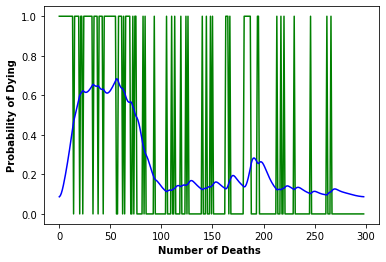

In [204]:
#Plot predictions
plt.plot(right_death_values, color = 'green')
plt.plot(revert_deaths, color = 'blue')
plt.xlabel("Number of Deaths ", fontweight = "bold")
plt.ylabel("Probability of Dying", fontweight = "bold")

In [205]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


## Hypothesis Testing on heart failure

#### How related to blood pressure

---



---



In [206]:
import pandas as pd
from scipy import stats
from statsmodels.stats import weightstats as stests

In [207]:
ztest ,pval = stests.ztest(df['high_blood_pressure'], x2=None, value=12)
print(float(pval))
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

0.0
reject null hypothesis


In [208]:
from scipy.stats import ttest_ind
df1 = np.genfromtxt(dataset,  delimiter=",")
df2 = np.genfromtxt(dataset,  delimiter=",")
print(df1)
print("df2 data :-\n")
print(df2)
df1_mean = np.mean(df1)
df2_mean = np.mean(df2)
print("df1 mean value:",df1_mean)
print("df2 mean value:",df2_mean)
df1_std = np.std(df1)
df2_std = np.std(df2)
print("df1 std value:",df1_std)
print("df2 std value:",df2_std)
ttest,pval = ttest_ind(df1,df2)
print("p-value",pval)
if pval.all() <0.05:
  print("we reject null hypothesis")
else:
  print("we accept null hypothesis")
if pval.any() <0.05:
  print("we reject null hypothesis")
else:
  print("we accept null hypothesis")

[[      nan       nan       nan ...       nan       nan       nan]
 [7.500e+01 0.000e+00 5.820e+02 ... 0.000e+00 4.000e+00 1.000e+00]
 [5.500e+01 0.000e+00 7.861e+03 ... 0.000e+00 6.000e+00 1.000e+00]
 ...
 [4.500e+01 0.000e+00 2.060e+03 ... 0.000e+00 2.780e+02 0.000e+00]
 [4.500e+01 0.000e+00 2.413e+03 ... 1.000e+00 2.800e+02 0.000e+00]
 [5.000e+01 0.000e+00 1.960e+02 ... 1.000e+00 2.850e+02 0.000e+00]]
df2 data :-

[[      nan       nan       nan ...       nan       nan       nan]
 [7.500e+01 0.000e+00 5.820e+02 ... 0.000e+00 4.000e+00 1.000e+00]
 [5.500e+01 0.000e+00 7.861e+03 ... 0.000e+00 6.000e+00 1.000e+00]
 ...
 [4.500e+01 0.000e+00 2.060e+03 ... 0.000e+00 2.780e+02 0.000e+00]
 [4.500e+01 0.000e+00 2.413e+03 ... 1.000e+00 2.800e+02 0.000e+00]
 [5.000e+01 0.000e+00 1.960e+02 ... 1.000e+00 2.850e+02 0.000e+00]]
df1 mean value: nan
df2 mean value: nan
df1 std value: nan
df2 std value: nan
p-value [nan nan nan nan nan nan nan nan nan nan nan nan nan]
we accept null hypothesis
we ac

In [209]:
print(df.columns.values.tolist())

['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time', 'DEATH_EVENT']




LSTM COMPARISON

As you can see, this new LSTM model with more layers gave use a better heart failure prediction. Through Neural Networks, we set up predictions as to how likely someone is to have a heart failure as they age. On our second model, the Blue line serves as our predicted heart failures over the time scale. We an say with high level of confidence that our second approximation supersedes the first.

THEOREM

We suspected that the more layers we add and the more neurons we use for the model, the better our model and approximation will become. We created a random sampling of our dataset. With all this data, we were ready to create the perfect neural network. We had all the data that we needed and we knew that there was a set optimal number of layers and neurons that our model needed to create the perfect configuration. As you can tell by our previous model, some of our predictions were overfitted. On this next model, we solved this problem by providing the model with the exact amount of neurons and layers that it needed to do the job. The result was the Neural Network predicting a better closing price estimation over the time scale.

CONCLUSION

In conclusion, with the use of machine learning, we have successfuly analyzed and predicted the heart failures based on factors stated diabetes, age, smoking, sex, serum sodium levels, serum creatinine levels, platelets levels, creatinine phosphokinase levels. This prediction was derived with the analysis of the columns of the given dataset. We then factored in thanks to these parameters, With all these parameters factored in, a great esimation to what the probability of having a heart attack looks like based on using all the above fearture parameters. Although this model yielded a pretty close estimation, the probability of having a heart attack varies across different individuals, their health habits, their genetics etc. These factors can not be predicted ahead of time because of the nature of situations. Through Machine Learning algorithms, technology is able to saves us time and money in the sense that we can look at historical data and a specific case and give advice on what an individual needs to do to prevent a heart attack.


In [210]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [211]:
! pwd 

/content


In [212]:
%%shell
jupyter nbconvert --to html /content/heart_failure_prediction.ipynb

[NbConvertApp] Converting notebook /content/heart_failure_prediction.ipynb to html
[NbConvertApp] Writing 1179067 bytes to /content/heart_failure_prediction.html
